In [1]:
import pandas as pd
import numpy as np2
import math
import matplotlib.pyplot as plt
import datetime 
import time
import random
from refainedLibrary_v3 import *
from statsmodels.tsa.api import Holt
from scipy.interpolate import *
from matplotlib.backend_bases import MouseButton
from tqdm.notebook import tqdm

pd.set_option("display.max_rows", None, "display.max_columns", None)

In [2]:
rd = Refained_Data('sCREEN-dataset.txt')
data = rd.get_dataset()

### Number of point for tag

In [18]:
for i in range(len(n)):
    print(f"{i} - {n[i]} - {tag_df.keys()[i]}")


0 - 62310.0 - 0x00205EFB161F
1 - 52558.0 - 0x00205F151090
2 - 51341.0 - 0x00205EFE0F24
3 - 43927.0 - 0x00205F151077
4 - 43564.0 - 0x00205F151091
5 - 41434.0 - 0x00205F151116
6 - 40618.0 - 0x00205F150CC6
7 - 40188.0 - 0x00205F151021
8 - 39327.0 - 0x00205EFB1321
9 - 38652.0 - 0x00205F15105B
10 - 38649.0 - 0x00205F0907BC
11 - 38548.0 - 0x00205F1510B5
12 - 37955.0 - 0x00205F151107
13 - 37578.0 - 0x00205F09087F
14 - 37228.0 - 0x00205F090123
15 - 36906.0 - 0x00205F1510FD
16 - 36816.0 - 0x00205F1510AA
17 - 35448.0 - 0x00205F151015
18 - 35369.0 - 0x00205F1510E8
19 - 35034.0 - 0x00205F090588
20 - 34549.0 - 0x00205F1510A9
21 - 33967.0 - 0x00205F15107E
22 - 32996.0 - 0x00205EFB0FD4
23 - 31970.0 - 0x00205F151064
24 - 31448.0 - 0x00205F150CD4
25 - 31205.0 - 0x00205F1510ED
26 - 30445.0 - 0x00205EFB12AC
27 - 29956.0 - 0x00205EFB1544
28 - 29338.0 - 0x00205F15105E
29 - 29037.0 - 0x00205F1510DB
30 - 28659.0 - 0x00205F1510AC
31 - 28643.0 - 0x00205F1510AB
32 - 27316.0 - 0x00205F1510EF
33 - 26911.0 - 0x002

In [20]:
#rimuove i carelli con solo 1 punto
print(len(data))
for i in range(134, len(n)):
    data = data.loc[data['tag_id'] != tag_df.keys()[i]]

print(len(data))

4622439
4622400


# Creazione Dataset primordiale

In [ ]:
name_file = "trajectories_2.csv"

file1 = open(name_file, "a") 
file1.write("id,tag_id,time,x,y,n_traj\n")
file1.close()

tag_df = data.groupby('tag_id')["x"].count()
valid_tag = []
for i, t in enumerate(tag_df.keys()):
    if tag_df.iloc[i] > 100:
        valid_tag.append(t)

num = 0
start_time = time.time()
for i, tag in enumerate(valid_tag):
    t1_time = time.time()
    sub_data = data.loc[data['tag_id'] == tag]
    sub_data = sub_data.sort_values('time')
    trajectories = rd.find_trajectory(sub_data, 1, 150, 1, 300)
    print(f"{(time.time() - t1_time)} seconds, tag: {tag}")
    for j, traj in enumerate(trajectories):
        traj["n_traj"] = num
        traj.to_csv(name_file, mode="a", header=False, index=True)
        num+=1

print(f"TOTAL TIME: {(time.time() - start_time)/60} minutes")


In [156]:
trajectories = rd.read_trajectories('trajectories.csv')
for idx, traj in enumerate(trajectories):
    tag_id = traj.iloc[0]["tag_id"]
    n_traj = traj.iloc[0]["n_traj"]
    print(f"Number of point for {tag_id} : {len(traj)}")
    traj = traj.drop_duplicates('time')
    print(f"Number of unique points: {len(traj)}")
    traj_resapled = traj.set_index('time', ).resample('3S').asfreq()
    traj_resapled["x"] = traj_resapled["x"].interpolate(method='linear')
    traj_resapled["y"] = traj_resapled["y"].interpolate(method='linear')
    #traj_resapled["tag_id"] = tag_id
    #traj_resapled["n_traj"] = n_traj
    print(f"Number of point for resampling trajectory: {len(traj_resapled)}")
    traj_resapled.reset_index(inplace=True)
    #print(traj_resapled)
    #traj_resapled.to_csv("trajectories_resampled_2.csv", mode="a", header=False, index=False)

Number of point for 0x00205EA90CD2 : 2712
Number of unique points: 789
Number of point for resampling trajectory: 796


Start time: 2016-07-01 16:55:42
End time: 2016-07-01 17:00:42
Time delta: 0 days 00:05:00


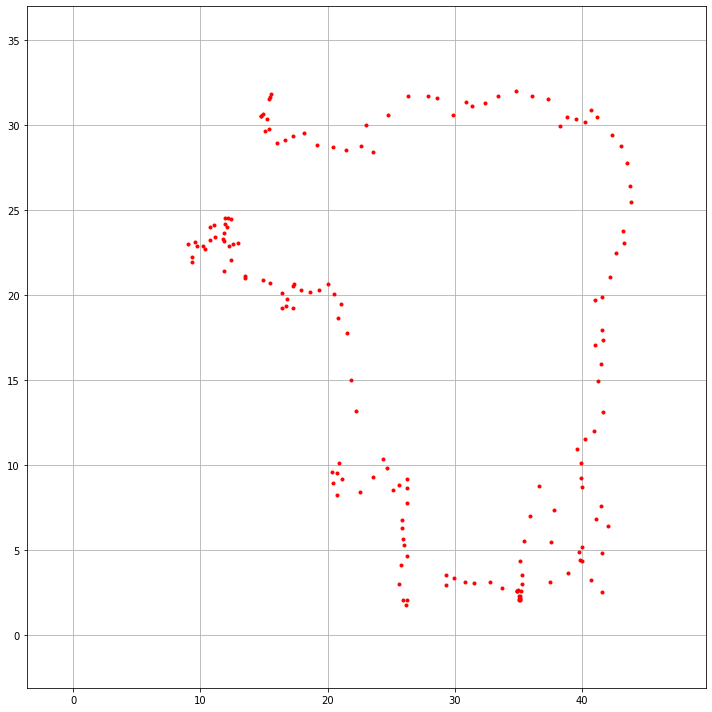

In [93]:
idx = 0
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_xlim(-3.63, 49.7)
ax.set_ylim(-3.08, 36.97)
ax.grid()
fig.tight_layout()

traj = trajectories[idx]
print("Start time:", traj['time'].min())
print("End time:", traj['time'].max())
print("Time delta:", traj['time'].max() - traj['time'].min())
y = traj['y'].values
x = traj['x'].values
ax.plot(x, y, f'.r')
plt.show()

### Studies conducted to determine the best interpolation method

# Interpolazione LINEARE

In [3]:
trajectories = rd.read_trajectories('trajectories_2.csv')

In [4]:
def inter_linear(traj):
    tag_id = traj.iloc[0]["tag_id"]
    n_traj = traj.iloc[0]["n_traj"]
    traj = traj.drop_duplicates('time')
    traj_resapled = traj.set_index('time', ).resample('1S').asfreq()
    traj_resapled["x"] = traj_resapled["x"].interpolate(method='linear')
    traj_resapled["y"] = traj_resapled["y"].interpolate(method='linear')
    print(f"Number of point for {tag_id} : {len(traj)}")
    print(f"Number of unique points: {len(traj)}")
    print(f"Number of point for resampling trajectory: {len(traj_resapled)}")
    traj_resapled.reset_index(inplace=True)  
    return traj_resapled

inter_linear(trajectories[5])

In [5]:
def inter_linear_2(traj):
    traj = traj.drop_duplicates('time')
    time_ts = traj['time'].apply(lambda x: x.value)

    fx = interp1d(time_ts, traj["x"],fill_value = "extrapolate" )
    fy = interp1d(time_ts, traj["y"],fill_value = "extrapolate" )

    traj_resapled = traj.set_index('time', ).resample('1S').asfreq()
    traj_resapled.reset_index(inplace=True)

    for idx, row in traj_resapled.iterrows():
        row = traj_resapled.loc[idx]
        if math.isnan(row["x"]):
            timestamp = row["time"].value
            traj_resapled.at[idx, "x"] = fx(timestamp)

        if math.isnan(row["y"]):
            timestamp = row["time"].value
            traj_resapled.at[idx, "y"] = fy(timestamp)

    tag_id = traj.iloc[0]["tag_id"]
    print(f"Number of point for {tag_id} : {len(traj)}")
    print(f"Number of unique points: {len(traj)}")
    print(f"Number of point for resampling trajectory: {len(traj_resapled)}")
    return traj_resapled 

inter_linear_2(trajectories[5])

# Interpolazione GAUSSIANA

In [6]:
def inter_gaussian(traj):
    tag_id = traj.iloc[0]["tag_id"]
    n_traj = traj.iloc[0]["n_traj"]
    traj = traj.drop_duplicates('time')
    traj_resapled = traj.set_index('time', ).resample('1S').asfreq()
    x_g = traj_resapled["x"].rolling(window=10, win_type='gaussian', center=True).mean(std=0.5)
    y_g = traj_resapled["y"].rolling(window=10, win_type='gaussian', center=True).mean(std=0.5)
    
    print(f"Number of point for {tag_id} : {len(traj)}")
    print(f"Number of unique points: {len(traj)}")
    print(f"Number of point for resampling trajectory: {len(traj_resapled)}")
    traj_resapled.reset_index(inplace=True)  
    return traj_resapled 
   
    
inter_gaussian(trajectories[5])

# Exponential Smoothing

In [7]:
def smoothing_exp(traj, alpha):
    traj = traj.drop_duplicates('time')
    traj_resapled = traj.set_index('time', ).resample('1S').asfreq()
    traj_resapled["x"] = traj_resapled["x"].interpolate(method='linear')
    traj_resapled["y"] = traj_resapled["y"].interpolate(method='linear')
    traj_resapled.reset_index(inplace=True)
    
    for idx, row in traj_resapled.iterrows():
        if idx == 0:
            traj_resapled.at[idx, "x"] = row["x"]
            traj_resapled.at[idx, "y"] = row["y"]
        else:
            old_row = traj_resapled.iloc[idx-1]
            traj_resapled.at[idx, "x"] = alpha*row["x"] + (1-alpha)*old_row["x"]
            traj_resapled.at[idx, "y"] = alpha*row["y"] + (1-alpha)*old_row["y"]
    
    tag_id = traj.iloc[0]["tag_id"]
    print(f"Number of point for {tag_id} : {len(traj)}")
    print(f"Number of unique points: {len(traj)}")
    print(f"Number of point for resampling trajectory: {len(traj_resapled)}")
    return traj_resapled 

smoothing_exp(trajectories[5], 0.3)

In [8]:
def smoothing_inter_exp(traj, alpha):
    
    tag_id = traj["tag_id"].iloc[0]
    print(f"Number of point for {tag_id} : {len(traj)}")
    
    traj = traj.drop_duplicates('time')
    traj.reset_index(inplace=True, drop= True)

    for idx, row in traj.iterrows():
        if idx == 0:
            traj.at[idx, "x"] = row["x"]
            traj.at[idx, "y"] = row["y"]
        else:
            old_row = traj.iloc[idx-1]
            traj.at[idx, "x"] = alpha*row["x"] + (1-alpha)*old_row["x"]
            traj.at[idx, "y"] = alpha*row["y"] + (1-alpha)*old_row["y"]

    traj_resapled = traj.set_index('time').resample('1S').asfreq()
    traj_resapled["x"] = traj_resapled["x"].interpolate(method='linear')
    traj_resapled["y"] = traj_resapled["y"].interpolate(method='linear')

    print(f"Number of unique points: {len(traj)}")
    print(f"Number of point for resampling trajectory: {len(traj_resapled)}")
    return traj_resapled 

result = smoothing_inter_exp(trajectories[200], 0.4)

In [3]:
#DEPRECATED
# Da usare per resample < 1 sec

def smoothing_inter_exp(traj, alpha):
    
    tag_id = traj["tag_id"].iloc[0]
    print(f"Number of point for {tag_id} : {len(traj)}")
    
    for idx, row in traj.iterrows():
        if idx == 0:
            traj.at[idx, "x"] = row["x"]
            traj.at[idx, "y"] = row["y"]
        else:
            old_row = traj.iloc[idx-1]
            traj.at[idx, "x"] = alpha*row["x"] + (1-alpha)*old_row["x"]
            traj.at[idx, "y"] = alpha*row["y"] + (1-alpha)*old_row["y"]

    traj_resapled = traj.set_index('time').resample('0.4S', origin = "start").asfreq()
    traj_resapled["x"] = traj_resapled["x"].interpolate(method='linear')
    traj_resapled["y"] = traj_resapled["y"].interpolate(method='linear')

    print(f"Number of unique points: {len(traj)}")
    print(f"Number of point for resampling trajectory: {len(traj_resapled)}")
    return traj_resapled 


In [4]:
# Da usare per resample < 1 sec
def smoothing_double_exp(traj, alpha, alpha2):
    
    n_traj = traj["n_traj"].iloc[0]
    tag_id = traj["tag_id"].iloc[0]
    
    traj = traj.drop_duplicates('time')
    traj.reset_index(inplace=True, drop= True)

    for idx, row in traj.iterrows():
        if idx == 0:
            traj.at[idx, "x"] = row["x"]
            traj.at[idx, "y"] = row["y"]
        else:
            old_row = traj.iloc[idx-1]
            traj.at[idx, "x"] = alpha*row["x"] + (1-alpha)*old_row["x"]
            traj.at[idx, "y"] = alpha*row["y"] + (1-alpha)*old_row["y"]
    
    traj.set_index('time', inplace = True)
    oidx = traj.index
    nidx = pd.date_range(oidx.min(), oidx.max(), freq='1s') # CAMBIARE FREQUENZA
    traj_resapled = traj.reindex(oidx.union(nidx))
    traj_resapled["x"] = traj_resapled["x"].interpolate(method='linear')
    traj_resapled["y"] = traj_resapled["y"].interpolate(method='linear')
    traj_resapled = traj_resapled.reindex(nidx)
    traj_resapled["n_traj"] = n_traj
    traj_resapled["tag_id"] = tag_id
 
    traj_resapled.reset_index(inplace=True, drop= False)
    traj_resapled.rename(columns = {"index":"time"}, inplace = True)
    
    for idx, row in traj_resapled.iterrows():
        if idx == 0:
            traj_resapled.at[idx, "x"] = row["x"]
            traj_resapled.at[idx, "y"] = row["y"]
        else:
            old_row = traj_resapled.iloc[idx-1]
            traj_resapled.at[idx, "x"] = alpha2*row["x"] + (1-alpha2)*old_row["x"]
            traj_resapled.at[idx, "y"] = alpha2*row["y"] + (1-alpha2)*old_row["y"] 
    
    traj_resapled = traj_resapled[["id","tag_id","time","x","y","n_traj"]]

   
    return traj_resapled 


Number of point for 0x00205F151186 : 368
Number of unique points: 368
Number of point for resampling trajectory: 2194
Number of point for 0x00205F151186 : 368
Number of unique points: 368
Number of point for resampling trajectory: 2194
Number of point for 0x00205F151186 : 368
Number of unique points: 368
Number of point for resampling trajectory: 2194
Number of point for 0x00205F151186 : 368
Number of unique points: 368
Number of point for resampling trajectory: 2194
Number of point for 0x00205F151186 : 417
Number of unique points: 368
Number of point for resampling trajectory: 2194


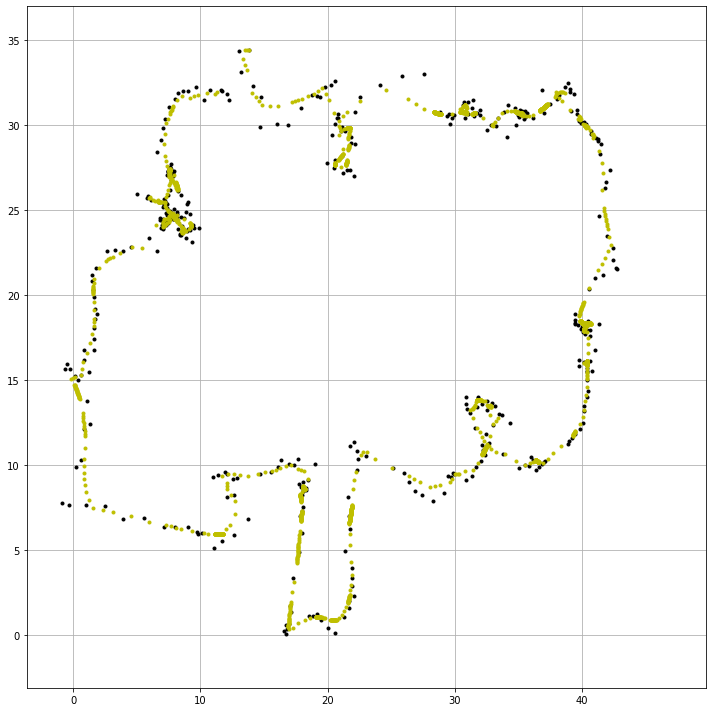

In [51]:
"""
- le due inter lineari sono uguali (sovraposizioni dei punti)
- la gaussiana è troppo dispersiva (manca andamento generale della traiettoria)
- con smoothing esponenziale dipende 
    ~ alpha grande: da più importanza al punto corrente 
    ~ alpha piccolo: crea un andamento generale
"""
path_image = "E:\\Università\\Magistrale\\TESI_MAG\\Tesi_magistrale\\img"

#4233 3878
traj = trajectories[4233]
d1 = inter_linear(traj)
d2 = inter_gaussian(traj)
d3 = smoothing_exp(traj, 0.4)
d4 = inter_linear_2(traj)
d5 = smoothing_inter_exp(traj, 0.4)


fig, ax = plt.subplots(figsize=(10, 10))
ax.set_xlim(-3.63, 49.7)
ax.set_ylim(-3.08, 36.97)
ax.grid()
fig.tight_layout()

y = traj['y'].values
x = traj['x'].values
p, = ax.plot(x, y, f'.k')

#LINEARE 1
y1 = d1['y'].values
x1 = d1['x'].values
#p1, = ax.plot(x1, y1, f'.b')

#GAUSSIANA
y2 = d2['y'].values
x2 = d2['x'].values
#p2, = ax.plot(x2, y2, f'.g')

#LINEAR + SMOOTHING
y3 = d3['y'].values
x3 = d3['x'].values
#p3, = ax.plot(x3, y3, f'.r')

#LINEARE 2
y4 = d4['y'].values
x4 = d4['x'].values
#p4, = ax.plot(x4, y4, f'.y')

#SMOOTHING + LINEAR
y5 = d5['y'].values
x5 = d5['x'].values
p5, = ax.plot(x5, y5, f'.y')

plt.savefig(f"{path_image}\\traj-smooth2.png")

plt.show()

# Re-sampling + Interpolazione

In [4]:
trajectories = rd.read_trajectories("trajectories_2.csv")

In [23]:
# DEPRECATO
def add_decSeconds(trajectories):
    new_trajectories = []
    for idx, traj in enumerate(tqdm(trajectories)):
        new_time = []
        new_time.append(traj.iloc[0]["time"])

        for i in range(1, len(traj)):
            row = traj.iloc[i]
            previous = new_time[i - 1]

            if previous >= row["time"]:
                new_time.append(previous + datetime.timedelta(seconds=0.4))
            else:
                time_delta = (row["time"] - previous).total_seconds()
                rest = (time_delta * 10) % 4
                new_time.append(row["time"] + datetime.timedelta(seconds=rest / 10))

        traj["time"] = new_time
        new_trajectories.append(traj)
    return new_trajectories

In [26]:
# PER VEDERE DUPPLICATI NEL TEMPO
d= traj[traj.duplicated(subset = "time", keep=False)]
d

,id,tag_id,time,x,y,n_traj


In [5]:

name_file = "trajectories_2_resampled_1s.csv"
file1 = open(name_file, "a") 
file1.write("id,tag_id,time,x,y,n_traj\n")
file1.close()

for idx, traj in enumerate(tqdm(trajectories)):

    resampled_traj = smoothing_double_exp(traj, 0.4, 0.25)
    
    resampled_traj["x"] = resampled_traj["x"].round(3)
    resampled_traj["y"] = resampled_traj["y"].round(3)

    resampled_traj.to_csv(name_file, mode="a", header=False, index=False)
    
       

  0%|          | 0/4283 [00:00<?, ?it/s]

In [12]:
trajectories = rd.read_trajectories('trajectories_2_resampled_04s.csv')
len(trajectories)

4283